#### `Explore AI Academy: Machine Learning-Classification Project`

***

## News Article Classification: End-to-End Machine Learning Project
<br>

<a id="cont"></a>

## Table of Contents
* [1. Project Overview](#chapter1)

    * [1.1 Introduction](#section_1_1)
        * [1.1.1 Problem Statement](#sub_section_1_1_1)
    * [1.2 Objectives](#section_1_2)

* [2. Importing Packages](#chapter2)

* [3. Loading Data](#chapter3)
 
* [4. Data Cleaning](#chapter4)

* [5. Exploratory Data Analysis (EDA)](#chapter5)

* [6. Feature Engineering](#chapter6)

* [7. Model Training](#chapter7) 

* [8. Model Performance](#chapter8)

* [9. Insights & Recommendations](#chapter9)

* [10. Conclusion](#chapter10)


***

### 1. Project Overview

#### 1.1. Introduction
The aim of this project is to analyze a dataset that provides a comprehensive collection of news articles across various domains, including Business, Technology, Sports, Education, and Entertainment. This end-to-end project covers the entire workflow, including data loading, preprocessing, model training, evaluation, and final deployment. The app will allow users to input new articles and receive category predictions, demonstrating the model's practical utility. Hosting the model in a Streamlit app online illustrates its real-world application and value.


#### 1.1.1. Problem Statement
The goal of this project is to build a model that can accurately classify news articles into predefined categories. Given the increasing volume of online content, a reliable automatic classification system can save significant time and effort for both content creators and readers. This project aims to develop and deploy such a system using machine learning techniques.
<br>

#### 1.2 Objectives

+ **Data Analysis and Cleaning:**
  + Load and inspect the dataset.
  + Clean and preprocess the data to handle missing values, inconsistencies, and irrelevant features.


+ **Exploratory Data Analysis (EDA):**
    + Understand the distribution and characteristics of the data.
    + Identify patterns and insights to guide feature engineering and model selection.

+ **Model Development:**
    + Train a variety of classification models to identify the best-performing one.
    + Evaluate model performance using appropriate metrics.

+ **Deployment:**
    + Deploy the final model using a Streamlit app.
    + Enable users to input new articles and receive category predictions.

+ **MLOps Integration:**
    + Utilize MLflow to track and manage model experiments.


***

### 2. Importing Packages

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Set the aesthetics for plotting
sns.set(style="whitegrid")


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Essential libraries for data loading, manipulation, analysis, visualization, and predictive modeling are imported to facilitate the project's objectives.

***

### 3. Loading Data


The dataset is loaded into DataFrames for both training and testing data.


In [5]:
# Load the training and testing data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display first few rows of the training data
print("Training Data:")
train_data.head()


Training Data:


,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [6]:
# Display first few rows of the test data
print("\nTest Data:")
test_data.head()


Test Data:


,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [7]:
# Make a copy of the dataframes
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

<div class="alert alert-block alert-danger">
To prevent any major unnecessary changes occurring to the original data, <b>we created a copy of the dataframes using copy() method and referred the dataframe copies as `train_data.copy()` and `test_data.copy()`</b>
</div>

In [8]:
# Check the shape of the data
print("Training Data Shape:", train_data_copy.shape)
print("Test Data Shape:", test_data_copy.shape)

Training Data Shape: (5520, 5)
Test Data Shape: (2000, 5)


In [9]:
train_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB


In [10]:
test_data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB


***

### 4. Data Cleaning


In [13]:

import re
def remove_urls(text):
    return re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

# Apply remove_urls to the content column
train_data_copy['headlines'] = train_data_copy['headlines'].apply(remove_urls)
test_data_copy['headlines'] = test_data_copy['headlines'].apply(remove_urls)

train_data_copy['description'] = train_data_copy['description'].apply(remove_urls)
test_data_copy['description'] = test_data_copy['description'].apply(remove_urls)

train_data_copy['content'] = train_data_copy['content'].apply(remove_urls)
test_data_copy['content'] = test_data_copy['content'].apply(remove_urls)

In [14]:
def to_lowercase(text):
    return text.lower()

# Apply the function to convert text to lowercase in the relevant columns
train_data_copy['headlines'] = train_data_copy['headlines'].apply(to_lowercase)
train_data_copy['description'] = train_data_copy['description'].apply(to_lowercase)
train_data_copy['content'] = train_data_copy['content'].apply(to_lowercase)

test_data_copy['headlines'] = test_data_copy['headlines'].apply(to_lowercase)
test_data_copy['description'] = test_data_copy['description'].apply(to_lowercase)
test_data_copy['content'] = test_data_copy['content'].apply(to_lowercase)


In [17]:
import nltk
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')

# Load English stopwords
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

train_data_copy['cleaned_text'] = train_data_copy['content'].apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /home/kgotso/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
from nltk.tokenize import word_tokenize

# Download the tokenizer
nltk.download('punkt')

def tokenize(text):
    tokens = word_tokenize(text)
    return tokens

train_data_copy['tokens'] = train_data_copy['cleaned_text'].apply(tokenize)


[nltk_data] Downloading package punkt to /home/kgotso/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download the WordNet corpus if not already downloaded
nltk.download('wordnet')

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_words(tokens):
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized)

train_data_copy['lemmatized_text'] = train_data_copy['tokens'].apply(lemmatize_words)


[nltk_data] Downloading package wordnet to /home/kgotso/nltk_data...


In [23]:
def remove_special_cases(text):
    # Example: Removing a specific word or phrase
    text = re.sub('example_phrase', '', text)
    # Handle or remove emojis or other specific characters
    text = text.encode('ascii', 'ignore').decode('ascii')
    return text

train_data_copy['final_text'] = train_data_copy['lemmatized_text'].apply(remove_special_cases)


In [24]:
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and special characters
    text = re.sub(r'\d+', '', text)      # Remove numbers
    return text

# Function to remove punctuation and special characters
def remove_punctuation(text):
    # Remove punctuation using regex
    text = re.sub(r'[^\w\s]', '', text)
    return text


# Apply the function to remove punctuation from the relevant columns
train_data_copy['headlines'] = train_data_copy['headlines'].apply(clean_text)
train_data_copy['description'] = train_data_copy['description'].apply(clean_text)
train_data_copy['content'] = train_data_copy['content'].apply(clean_text)

test_data_copy['headlines'] = test_data_copy['headlines'].apply(clean_text)
test_data_copy['description'] = test_data_copy['description'].apply(clean_text)
test_data_copy['content'] = test_data_copy['content'].apply(clean_text)



In [25]:
# Import necessary packages for stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

# Ensure necessary NLTK resources are downloaded

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Create a function that will tokenize and stem the words from the dataframes
def stem_text(text):
    tokens = word_tokenize(text)  # Tokenize the text
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  # Stem each token
    return ' '.join(stemmed_tokens)  # Join the stemmed tokens back into a string

# Ensure text columns are strings
train_data_copy['headlines'] = train_data_copy['headlines'].astype(str)
train_data_copy['description'] = train_data_copy['description'].astype(str)
train_data_copy['content'] = train_data_copy['content'].astype(str)

test_data_copy['headlines'] = test_data_copy['headlines'].astype(str)
test_data_copy['description'] = test_data_copy['description'].astype(str)
test_data_copy['content'] = test_data_copy['content'].astype(str)

# Apply the function to stem words in the relevant columns
train_data_copy['headlines'] = train_data_copy['headlines'].apply(stem_text)
train_data_copy['description'] = train_data_copy['description'].apply(stem_text)
train_data_copy['content'] = train_data_copy['content'].apply(stem_text)

test_data_copy['headlines'] = test_data_copy['headlines'].apply(stem_text)
test_data_copy['description'] = test_data_copy['description'].apply(stem_text)
test_data_copy['content'] = test_data_copy['content'].apply(stem_text)

# Display the first few rows to check the results
print(train_data_copy.head())
print(test_data_copy.head())


                                           headlines  \
0  rbi revis definit of politicallyexpos person f...   
1  ndtv q net profit fall to rs crore impact by l...   
2  akasa air well capitalis can grow much faster ...   
3  india current account deficit declin sharpli t...   
4  state borrow cost soar to highest so far thi f...   

                                         description  \
0  the central bank ha also ask chairperson and c...   
1  ndtv consolid revenu from oper wa rs crore as ...   
2  the initi share sale will be open for public s...   
3  the current account deficit cad wa per cent of...   
4  the price shot up reflect the overal higher ri...   

                                             content  \
0  the reserv bank of india rbi ha chang the defi...   
1  broadcast new delhi televis ltd on monday repo...   
2  homegrown server maker netweb technolog india ...   
3  india current account deficit declin sharpli t...   
4  state have been forc to pay through their n

In [26]:
test_data_copy.head()

,headlines,description,content,url,category
0,nlc india win contract for power suppli to raj...,stateown firm nlc india ltd nlcil on monday sa...,stateown firm nlc india ltd nlcil on monday sa...,https://indianexpress.com/article/business/com...,business
1,sbi clerk prelim exam date announc admit card ...,sbi clerk prelim exam the sbi clerk prelim exa...,sbi clerk prelim exam the state bank of indian...,https://indianexpress.com/article/education/sb...,education
2,golden globe michel yeoh will ferrel angela ba...,barbi is the top nomine thi year follow close ...,michel yeoh will ferrel angela bassett and ama...,https://indianexpress.com/article/entertainmen...,entertainment
3,oneplu nord at rs as part of new price cut her...,new deal make the oneplu nord an easi purchas ...,in our review of the oneplu nord g we prais it...,https://indianexpress.com/article/technology/t...,technology
4,adani famili partner use opaqu fund to invest ...,cite review of file from multipl tax haven and...,million of dollar were invest in some publicli...,https://indianexpress.com/article/business/ada...,business


In [27]:
train_data_copy.head()

,headlines,description,content,url,category,cleaned_text,tokens,lemmatized_text,final_text
0,rbi revis definit of politicallyexpos person f...,the central bank ha also ask chairperson and c...,the reserv bank of india rbi ha chang the defi...,https://indianexpress.com/article/business/ban...,business,reserve bank india (rbi) changed definition po...,"[reserve, bank, india, (, rbi, ), changed, def...",reserve bank india ( rbi ) changed definition ...,reserve bank india ( rbi ) changed definition ...
1,ndtv q net profit fall to rs crore impact by l...,ndtv consolid revenu from oper wa rs crore as ...,broadcast new delhi televis ltd on monday repo...,https://indianexpress.com/article/business/com...,business,broadcaster new delhi television ltd monday re...,"[broadcaster, new, delhi, television, ltd, mon...",broadcaster new delhi television ltd monday re...,broadcaster new delhi television ltd monday re...
2,akasa air well capitalis can grow much faster ...,the initi share sale will be open for public s...,homegrown server maker netweb technolog india ...,https://indianexpress.com/article/business/mar...,business,homegrown server maker netweb technologies ind...,"[homegrown, server, maker, netweb, technologie...",homegrown server maker netweb technology india...,homegrown server maker netweb technology india...
3,india current account deficit declin sharpli t...,the current account deficit cad wa per cent of...,india current account deficit declin sharpli t...,https://indianexpress.com/article/business/eco...,business,india’s current account deficit declined sharp...,"[india, ’, s, current, account, deficit, decli...",india ’ s current account deficit declined sha...,india s current account deficit declined shar...
4,state borrow cost soar to highest so far thi f...,the price shot up reflect the overal higher ri...,state have been forc to pay through their nose...,https://indianexpress.com/article/business/eco...,business,states forced pay nose weekly auction debt tue...,"[states, forced, pay, nose, weekly, auction, d...",state forced pay nose weekly auction debt tues...,state forced pay nose weekly auction debt tues...


In [28]:


# Attempt to convert the column to numeric, coercing errors to NaN
data['category'] = pd.to_numeric(data['category'], errors='coerce')

# Check for rows where the conversion failed (i.e., where values are now NaN)
print(data[data['category'].isna()])


                                              headlines  \
0     NLC India wins contract for power supply to Ra...   
1     SBI Clerk prelims exams dates announced; admit...   
2     Golden Globes: Michelle Yeoh, Will Ferrell, An...   
3     OnePlus Nord 3 at Rs 27,999 as part of new pri...   
4     Adani family’s partners used ‘opaque’ funds to...   
...                                                 ...   
1995  Sri Lankan government renews Lanka IOC’s petro...   
1996  Kia launches new Seltos with price starting at...   
1997  Rebel Moon movie review: Zack Snyder’s spectac...   
1998  ChatGPT most popular AI tool with 14.6 billion...   
1999  Salaar Movie Review: Prabhas’ violence-riddled...   

                                            description  \
0     State-owned firm NLC India Ltd (NLCIL) on Mond...   
1     SBI Clerk Prelims Exam: The SBI Clerk prelims ...   
2     Barbie is the top nominee this year, followed ...   
3     New deal makes the OnePlus Nord 3 an easy purc...

In [86]:
# Convert the column to string if it's not
if data['category'].dtype != 'object':
    data['category'] = data['category'].astype(str)

# Now you can safely use .str accessor methods
data['category'] = data['category'].str.upper()  # Example to convert text to uppercase


In [31]:
train_data_copy.head()

,headlines,description,content,url,category
0,rbi revises definition of politically-exposed ...,the central bank has also asked chairpersons a...,the reserve bank of india (rbi) has changed th...,https://indianexpress.com/article/business/ban...,business
1,ndtv q2 net profit falls 57.4% to rs 5.55 cror...,ndtv's consolidated revenue from operations wa...,broadcaster new delhi television ltd on monday...,https://indianexpress.com/article/business/com...,business
2,"akasa air ‘well capitalised’, can grow much fa...",the initial share sale will be open for public...,homegrown server maker netweb technologies ind...,https://indianexpress.com/article/business/mar...,business
3,india’s current account deficit declines sharp...,the current account deficit (cad) was 3.8 per ...,india’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"states borrowing cost soars to 7.68%, highest ...",the prices shot up reflecting the overall high...,states have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [32]:
test_data_copy.head()

,headlines,description,content,url,category
0,nlc india wins contract for power supply to ra...,state-owned firm nlc india ltd (nlcil) on mond...,state-owned firm nlc india ltd (nlcil) on mond...,https://indianexpress.com/article/business/com...,business
1,sbi clerk prelims exams dates announced; admit...,sbi clerk prelims exam: the sbi clerk prelims ...,sbi clerk prelims exam: the state bank of indi...,https://indianexpress.com/article/education/sb...,education
2,"golden globes: michelle yeoh, will ferrell, an...","barbie is the top nominee this year, followed ...","michelle yeoh, will ferrell, angela bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"oneplus nord 3 at rs 27,999 as part of new pri...",new deal makes the oneplus nord 3 an easy purc...,"in our review of the oneplus nord 3 5g, we pra...",https://indianexpress.com/article/technology/t...,technology
4,adani family’s partners used ‘opaque’ funds to...,citing review of files from multiple tax haven...,millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


***

**Feature extraction**

We used the **Bag of words** method for feature extraction


**-** it is a technique where text is represented as a collection (bag) of words, disregarding grammar and word order but keeping multiplicity.

**-** Each word in the vocabulary becomes a feature, and the text is represented by the frequency (or presence) of these words.

In [34]:
from sklearn.feature_extraction.text import CountVectorizer
from scipy.sparse import hstack

# Combine all text columns into a single column for vectorization
train_data_copy['text'] = train_data_copy['headlines'] + " " + train_data_copy['description'] + " " + train_data_copy['content']
test_data_copy['text'] = test_data_copy['headlines'] + " " + test_data_copy['description'] + " " + test_data_copy['content']

# Initialize the CountVectorizer for Bag of Words
count_vectorizer = CountVectorizer(max_features=5000)

# Fit and transform the training data
X_train_bow = count_vectorizer.fit_transform(train_data_copy['text'])

# Transform the testing data
X_test_bow = count_vectorizer.transform(test_data_copy['text'])

# The target labels
y_train = train_data_copy['category']

# Display the shape of the resulting matrices
print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

# Display a sample of the Bag of Words feature matrix
print("\nSample of Bag of Words feature matrix (Training Data):")
print(X_train_bow.toarray()[:5])


Shape of X_train_bow: (5520, 5000)
Shape of X_test_bow: (2000, 5000)

Sample of Bag of Words feature matrix (Training Data):
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Shape of X_train_bow:** (5520, 5000)
5520: This represents the number of samples (or rows) in your training dataset. It indicates that you have 5520 news articles in your training set.


5000: This is the number of features (or columns) in the BoW matrix. It means that the CountVectorizer has identified 5000 unique words (or tokens) from the training dataset to be used as features. This limit was set by the max_features=5000 parameter.



**Shape of X_test_bow:** (2000, 5000)
2000: This represents the number of samples (or rows) in your testing dataset. It indicates that you have 2000 news articles in your test set.


5000: This is the number of features (or columns) in the BoW matrix for the test dataset. The same 5000 features (words/tokens) identified from the training dataset are used to transform the test dataset.

### 5. Exploratory Data Analysis (EDA)


***

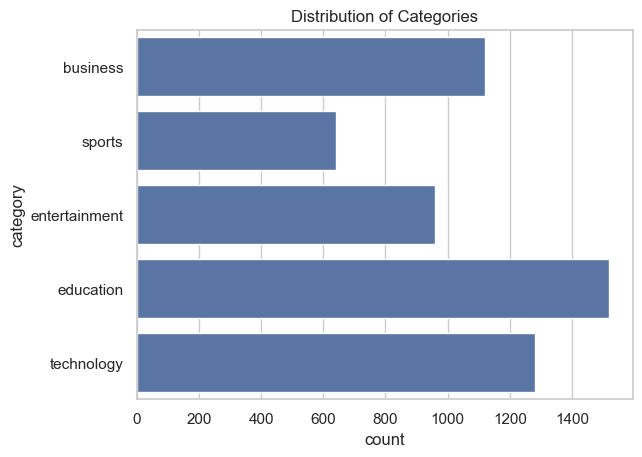

In [62]:
# Assuming 'category_column' is the name of a categorical column
sns.countplot(data=train_data,y='category')
plt.title('Distribution of Categories')
plt.show()


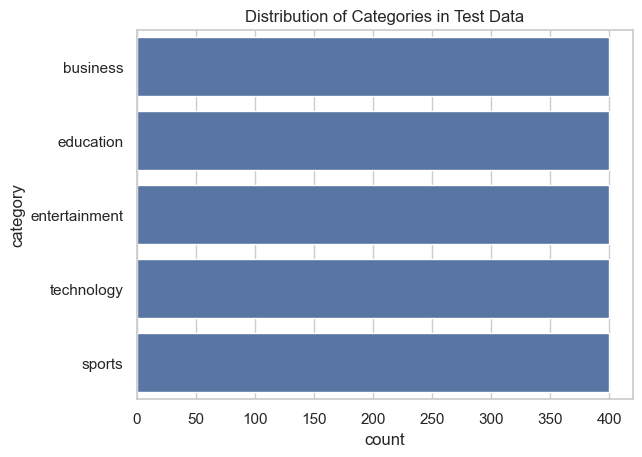

In [65]:
sns.countplot(y='category', data=test_data)
plt.title('Distribution of Categories in Test Data')
plt.show()

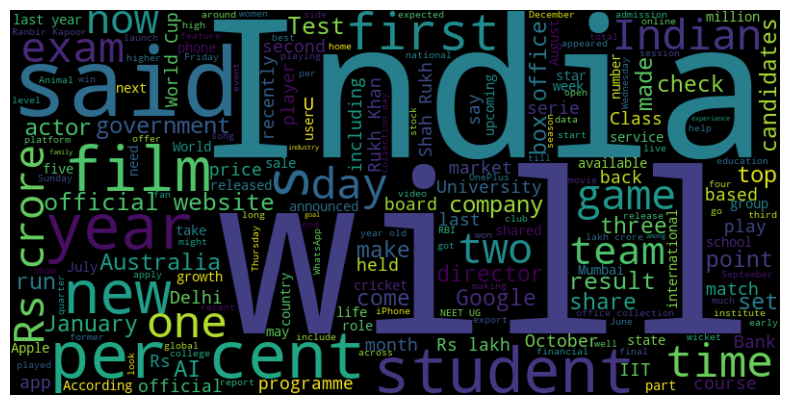

In [66]:
text =' '.join(test_data['description'].astype(str))
wordcloud =WordCloud(width=800, height=400).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

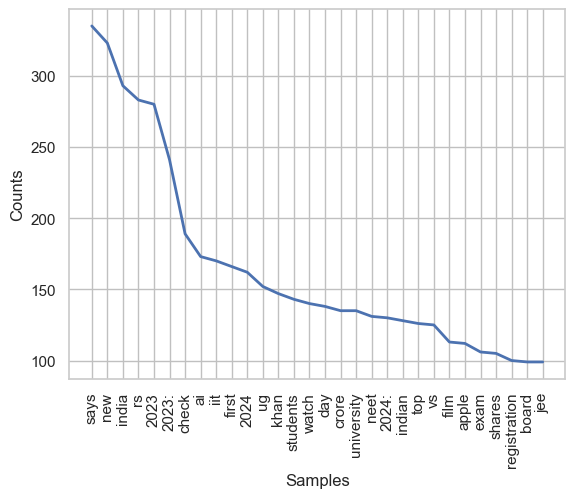

In [67]:
def plot_most_common_words(text_series, num=30):
    words = '  '.join(text_series).lower().split()
    filtered_words = [word for word in words if word not in stopwords.words('english')]
    freq_dist = nltk.FreqDist(filtered_words)
    freq_dist.plot(num, cumulative=False)
    plt.show()

36
plot_most_common_words(train_data['headlines'])    

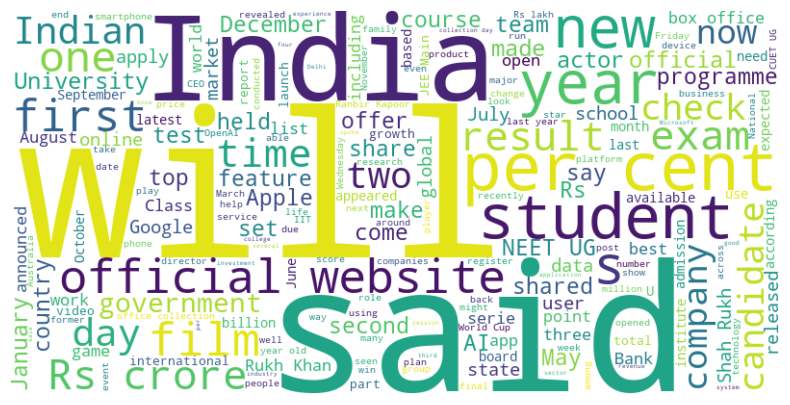

In [69]:
text = '  '.join(train_data['description'].dropna())
wordcloud = WordCloud(width= 800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 6. Model training

In [77]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


In [78]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(max_depth=5),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100),
    'Support Vector Machine': SVC(kernel='linear')
}


In [81]:
def load_and_split_data():
    data= pd.read_csv('train.csv')
    X = data.drop(columns=['category'])
    y = data['headlines']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = load_and_split_data()


In [89]:
print(models)

{'Logistic Regression': LogisticRegression(max_iter=1000), 'Decision Tree': DecisionTreeClassifier(max_depth=5), 'Random Forest': RandomForestClassifier(), 'Gradient Boosting': GradientBoostingClassifier(), 'Support Vector Machine': SVC(kernel='linear')}


In [92]:
X_train.head()

,headlines,description,content,url
4328,What keeps Sam Altman up at night? OpenAI CEO ...,"At a recent event, Sam Altman shared his uniqu...","The CEO of OpenAI, who had a rather turbulent ...",https://indianexpress.com/article/technology/a...
1844,‘Shah Rukh Khan’s Mannat has ‘airport like’ se...,Vikram Kochhar recalled how Shah Rukh Khan inv...,Bollywood actor Shah Rukh Khan’s upcoming film...,https://indianexpress.com/article/entertainmen...
4566,Best Samsung smartphones to consider ahead of ...,"The Galaxy S23 Ultra, despite being almost an ...",Samsung Unpacked 2024 is just around the corne...,https://indianexpress.com/article/technology/t...
957,Domestic institutions not part of FPI-led bull...,"India, the world’s third-largest consumer of c...",Indian refiners saved at least $7.17 billion i...,https://indianexpress.com/article/business/com...
4056,"Internships, time limit, Ukraine, Russia stude...",All FMGs will have to complete their internshi...,The National Medical Commission (NMC) has rele...,https://indianexpress.com/article/education/in...


In [87]:
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    predictions = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{report}\n")


ValueError: could not convert string to float: 'What keeps Sam Altman up at night? OpenAI CEO reveals his darkest fears about AI'

***

### 8. Model Performance

***

### 8. Insights & Recommendations

***

### 9. Conclusion

***

### THE END